In [1]:
import numpy as np
from os.path import join
import os
from algorithms.ant_colony import VPR
from tools.data_loader import get_data
from tools.measures import get_all_results
import pandas as pd

# Лабораторная работа № 5

## Solving Vehicle Routing Problem using  Ant Colony Optimisation (ACO) Algorithm

Выполнили Куклин, Кислицына, Аросланкин.  
Здесь представлены результаты работы алгоритма Ant Colony для решения VRP.

### Эксперименты

Выкачиваем и формируем примеры задач, на которых будем проводить эксперименты.

In [2]:
files_A = os.listdir('./data/benchmark/A')
files_A.sort()
files_B = os.listdir('./data/benchmark/B')
files_B.sort()

cases = []
for file in files_A:
    case = get_data('A/' + file)
    if case:
        cases.append(case)
for file in files_B:
    case = get_data('B/' + file)
    if case:
        cases.append(case)

A-n32-k5  is done!
A-n33-k5  is done!
A-n33-k6  is done!
A-n34-k5  is done!
A-n36-k5  is done!
A-n37-k5  is done!
A-n37-k6  is done!
A-n38-k5  is done!
A-n39-k5  is done!
A-n39-k6  is done!
A-n44-k6  is done!
A-n45-k6  is done!
A-n45-k7  is done!
A-n46-k7  is done!
A-n48-k7  is done!
A-n53-k7  is done!
A-n54-k7  is done!
A-n55-k9  is done!
A-n60-k9  is done!
A-n61-k9  is done!
A-n62-k8  is done!
A-n63-k10  is done!
A-n63-k9  is done!
A-n64-k9  is done!
A-n65-k9  is done!
A-n69-k9  is done!
A-n80-k10  is done!
B-n31-k5  is done!
B-n34-k5  is done!
B-n35-k5  is done!
B-n38-k6  is done!
B-n39-k5  is done!
B-n41-k6  is done!
B-n43-k6  is done!
B-n44-k7  is done!
B-n45-k5  is done!
B-n45-k6  is done!
B-n50-k7  is done!
B-n50-k8  is done!
B-n51-k7  is done!
B-n52-k7  is done!
B-n56-k7  is done!
B-n57-k7  is done!
B-n57-k9  is done!
B-n63-k10  is done!
B-n64-k9  is done!
B-n66-k9  is done!
B-n67-k10  is done!
B-n68-k9  is done!
B-n78-k10  is done!


**Параметры алгоритма:**  
* ***epochs*** - кол-во эпох (кол-во глобальных обновлений)
* ***n_ants*** - сколько муравьев проходит за одну эпоху
* ***alpha*** - коэффициент влияние феромона
* ***beta*** - коэффициент влияния длины дороги
* ***rho*** - коэффициент роста уровня феромона 
* ***init_pher*** - начальный уровень феромонов

### Работа алгоритма на одном из примеров примеров 

Возьмем один из примеров задачи и посмотрим, как для него работает ACO.  

##### 

In [6]:
i = 10
case = VPR(cases[i]['n_trucks'], cases[i]['dimension'], cases[i]['capacity'], cases[i]['demands'], cases[i]['adj_matrix'])
case.compute(epochs=100, n_ants=50, alpha=1.5, beta=0.3, rho=0.95, init_pheromone=1000)

In [7]:
case.final_cost

1114.6763214398745

In [10]:
case.final_sol

[[0, 31, 8, 15, 28, 27, 19, 24, 0],
 [0, 4, 34, 17, 12, 3, 6, 10, 21, 0],
 [0, 2, 22, 36, 9, 38, 41, 14, 13, 0],
 [0, 7, 33, 5, 32, 37, 42, 11, 26, 0],
 [0, 1, 35, 18, 20, 16, 30, 39, 0],
 [0, 43, 29, 40, 23, 25, 0]]

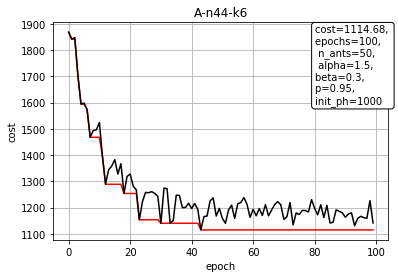

In [9]:
case.plot_function()

In [12]:
cases[10]

{'name': 'A-n44-k6',
 'n_trucks': 6,
 'opt': 937.0,
 'dimension': 44,
 'capacity': 100,
 'coordinates': array([[14, 68],
        [73,  2],
        [13, 47],
        [37, 44],
        [34, 63],
        [58, 98],
        [33, 42],
        [18, 98],
        [24, 79],
        [17, 28],
        [72, 67],
        [78, 63],
        [42, 48],
        [ 1,  2],
        [ 2, 28],
        [32, 82],
        [97, 38],
        [39, 53],
        [87,  1],
        [42, 77],
        [83, 27],
        [79, 92],
        [22, 39],
        [58, 32],
        [53, 84],
        [38, 37],
        [63, 59],
        [42, 88],
        [32, 88],
        [38, 23],
        [63, 32],
        [22, 73],
        [88, 94],
        [58, 78],
        [43, 62],
        [73,  1],
        [17, 32],
        [87, 79],
        [12, 24],
        [48, 53],
        [48, 23],
        [ 7, 37],
        [98, 77],
        [34, 12]]),
 'demands': array([ 0,  8, 24,  9, 19,  9, 18,  9, 14,  3, 14,  8,  8, 13, 18,  4, 24,
        14,  8, 

Теперь для каждого примера задачи запустим алгоритм с разными значениями параметров.
Для каждого набора параметров высчитаем среднее время выполнения алгоритма (**mean_time**), покажем значение целевой функции для найденного решения (**cost**) и сравним с известным оптимальным значением.

In [1]:
# TODO: change params

Для данного эксперимента были взяты следующие **значения параметров**:  
* ***epochs*** = 100
* ***n_ants*** = {50, 100}
* ***alpha*** = {0.5, 1.5}
* ***beta*** = {0.5, 0.1}
* ***rho*** = {0.1, 0.95} 
* ***init_pher*** = {1, 1000}

In [ ]:
files = os.listdir('./data/comparisons_old')
for 
df = pd.read_csv('./data/comparisons.old')

In [3]:
df = get_all_results(cases[:7])

100%|██████████| 7/7 [1:27:07<00:00, 746.82s/it]


In [4]:
df

,case,epochs,n_ants,alpha,beta,p,init_pher,mean_time,found_cost,opt_cost
0,A-n32-k5,100,10,0.9,0.1,0.5,0.5,3.9001,1511.1020,784.0
1,A-n32-k5,100,10,0.9,0.1,0.5,100.0,3.6797,1495.0100,784.0
2,A-n32-k5,100,10,0.9,0.1,100.0,0.5,3.3498,1107.0861,784.0
3,A-n32-k5,100,10,0.9,0.1,100.0,100.0,3.7260,1076.3349,784.0
4,A-n32-k5,100,10,1.2,0.1,0.5,0.5,3.7476,1353.6258,784.0
...,...,...,...,...,...,...,...,...,...,...
247,A-n37-k6,100,100,1.2,0.1,100.0,100.0,48.0113,1133.3606,949.0
248,A-n37-k6,100,100,1.5,0.1,0.5,0.5,46.8781,1181.9998,949.0
249,A-n37-k6,100,100,1.5,0.1,0.5,100.0,48.8781,1144.9994,949.0
250,A-n37-k6,100,100,1.5,0.1,100.0,0.5,43.7283,1144.2385,949.0


In [4]:
i = 7
j = 10
df2 = get_all_results(cases[i: j], 'results' + str(i) + '_' + str(j - 1) + '.csv')

100%|██████████| 3/3 [09:27<00:00, 189.14s/it]


In [5]:
i = 10
j = 14
df3 = get_all_results(cases[i: j], 'results' + str(i) + '_' + str(j - 1) + '.csv')

100%|██████████| 4/4 [17:35<00:00, 263.86s/it]


In [7]:
ind = []
for case in set(df2.case):
    m = df2[df2.case == case]['found_cost'].min()
    ind.append(df2[(df2.case == case) & (df2.found_cost == m)]['mean_time'].idxmin())
df_sol = df2.iloc[ind]
df_sol.index = range(len(set(df2.case)))
df_sol

,case,epochs,n_ants,alpha,beta,p,init_pher,mean_time,found_cost,opt_cost
0,A-n39-k5,100,100,1.5,0.1,0.5,0.5,46.6934,985.1509,822.0
1,A-n38-k5,100,100,1.5,0.1,100.0,0.5,43.7751,892.6420,730.0
2,A-n39-k6,100,100,1.5,0.1,0.5,0.5,51.0457,1023.9162,831.0


In [8]:
ind = []
for case in set(df3.case):
    m = df3[df3.case == case]['found_cost'].min()
    ind.append(df3[(df3.case == case) & (df3.found_cost == m)]['mean_time'].idxmin())
df_sol = df3.iloc[ind]
df_sol.index = range(len(set(df3.case)))
df_sol

,case,epochs,n_ants,alpha,beta,p,init_pher,mean_time,found_cost,opt_cost
0,A-n45-k6,100,100,1.5,0.1,100.0,0.5,65.7918,1180.0633,944.0
1,A-n46-k7,100,100,1.5,0.1,0.5,0.5,66.6185,1148.2284,914.0
2,A-n44-k6,100,100,1.5,0.1,0.5,0.5,61.1328,1080.0796,937.0
3,A-n45-k7,100,100,1.5,0.1,100.0,0.5,65.4143,1353.4290,1146.0


In [9]:
pd.options.display.max_rows = 1000
df

,case,epochs,n_ants,alpha,beta,p,init_pher,mean_time,found_cost,opt_cost
0,A-n32-k5,100,10,0.9,0.1,0.5,0.5,3.9001,1511.1020,784.0
1,A-n32-k5,100,10,0.9,0.1,0.5,100.0,3.6797,1495.0100,784.0
2,A-n32-k5,100,10,0.9,0.1,100.0,0.5,3.3498,1107.0861,784.0
3,A-n32-k5,100,10,0.9,0.1,100.0,100.0,3.7260,1076.3349,784.0
4,A-n32-k5,100,10,1.2,0.1,0.5,0.5,3.7476,1353.6258,784.0
5,A-n32-k5,100,10,1.2,0.1,0.5,100.0,3.8819,1339.4222,784.0
6,A-n32-k5,100,10,1.2,0.1,100.0,0.5,3.5501,1108.8318,784.0
7,A-n32-k5,100,10,1.2,0.1,100.0,100.0,3.5206,1047.2768,784.0
8,A-n32-k5,100,10,1.5,0.1,0.5,0.5,3.3535,1273.0909,784.0
9,A-n32-k5,100,10,1.5,0.1,0.5,100.0,3.6610,1194.2649,784.0


In [11]:
set(df.case)

{'A-n32-k5',
 'A-n33-k5',
 'A-n33-k6',
 'A-n34-k5',
 'A-n36-k5',
 'A-n37-k5',
 'A-n37-k6'}

In [21]:
df[df.case=='A-n36-k5'].sort_values(['found_cost'])

,case,epochs,n_ants,alpha,beta,p,init_pher,mean_time,found_cost,opt_cost
162,A-n36-k5,100,50,1.2,0.1,100.0,0.5,18.8843,925.6756,799.0
175,A-n36-k5,100,100,1.2,0.1,100.0,100.0,39.8260,927.1699,799.0
176,A-n36-k5,100,100,1.5,0.1,0.5,0.5,38.3897,944.9009,799.0
177,A-n36-k5,100,100,1.5,0.1,0.5,100.0,41.3071,961.8561,799.0
179,A-n36-k5,100,100,1.5,0.1,100.0,100.0,38.6812,965.3081,799.0
174,A-n36-k5,100,100,1.2,0.1,100.0,0.5,38.2245,985.6826,799.0
163,A-n36-k5,100,50,1.2,0.1,100.0,100.0,20.3719,988.8135,799.0
178,A-n36-k5,100,100,1.5,0.1,100.0,0.5,37.5319,994.1143,799.0
151,A-n36-k5,100,10,1.2,0.1,100.0,100.0,4.0353,1001.0916,799.0
167,A-n36-k5,100,50,1.5,0.1,100.0,100.0,19.7278,1004.9396,799.0


In [15]:
ind = []
for case in set(df.case):
    m = df[df.case == case]['found_cost'].min()
    ind.append(df[(df.case == case) & (df.found_cost == m)]['mean_time'].idxmin())
df_sol = df.iloc[ind]
df_sol.index = range(len(set(df.case)))
df_sol

,case,epochs,n_ants,alpha,beta,p,init_pher,mean_time,found_cost,opt_cost
0,A-n33-k5,100,100,1.5,0.1,0.5,0.5,35.1286,743.3735,661.0
1,A-n36-k5,100,50,1.2,0.1,100.0,0.5,18.8843,925.6756,799.0
2,A-n37-k5,100,100,1.2,0.1,0.5,100.0,37.9056,814.2988,669.0
3,A-n33-k6,100,100,1.5,0.1,100.0,0.5,38.0522,836.3357,742.0
4,A-n37-k6,100,100,1.2,0.1,100.0,0.5,45.5890,1084.5410,949.0
5,A-n32-k5,100,50,1.5,0.1,0.5,100.0,17.6209,847.9632,784.0
6,A-n34-k5,100,100,1.5,0.1,0.5,0.5,36.9933,910.4354,778.0


In [5]:
0.9 0.1 100 200
[[0, 20, 25, 5, 29, 10, 15, 9, 22, 18, 8, 26, 0], [0, 12, 1, 16, 30, 24, 14, 0], [0, 7, 13, 31, 19, 17, 21, 0], [0, 4, 11, 2, 3, 23, 28, 6, 0], [0, 27, 0]]
Cost: 904.6012215183109

SyntaxError: invalid syntax (<ipython-input-5-1e7b668c44b7>, line 1)

In [ ]:
0.9 0.1 100 300
[[0, 20, 5, 10, 25, 15, 29, 22, 9, 8, 18, 26, 0], [0, 11, 4, 28, 23, 2, 3, 6, 14, 0], [0, 24, 27, 1, 30, 12, 0], [0, 17, 31, 19, 21, 13, 7, 0], [0, 16, 0]]
Cost: 902.0623109936025

In [ ]:
1.5 0.1 100 100
[[0, 20, 5, 10, 25, 15, 9, 22, 8, 18, 29, 26, 0], [0, 4, 11, 28, 23, 2, 3, 6, 14, 0], [0, 24, 30, 12, 16, 7, 0], [0, 1, 13, 21, 31, 17, 19, 0], [0, 27, 0]]
Cost: 895.3785340813067

In [ ]:
A-n33-k6
1.2 0.1 100 100
[[0, 32, 10, 17, 18, 6, 13, 5, 3, 0], [0, 28, 27, 30, 16, 25, 21, 0], [0, 8, 4, 22, 26, 24, 23, 31, 0], [0, 14, 7, 2, 9, 20, 15, 0], [0, 12, 11, 0], [0, 1, 19, 29, 0]]
Cost: 869.4114084623029